In [1]:
from PIL import Image
from pathlib import Path
import os
from options.test_options import TestOptions
from models.pix2pix_model import Pix2PixModel
import sys


# checkpoint url: https://drive.google.com/uc?export=download&id=1RHGo6X9jONSUno_ejW4UjI_zfTDGvA-m

In [2]:
sys.argv = [sys.argv[0]]+'--name ade20k_pretrained --dataset_mode ade20k --dataroot datasets/ADEChallengeData2016/'.split(' ')
opt = TestOptions().parse()

----------------- Options ---------------
             aspect_ratio: 1.0                           
                batchSize: 1                             
      cache_filelist_read: False                         
     cache_filelist_write: False                         
          checkpoints_dir: ./checkpoints                 
   contain_dontcare_label: True                          
                crop_size: 256                           
                 dataroot: datasets/ADEChallengeData2016/	[default: ./datasets/cityscapes/]
             dataset_mode: ade20k                        	[default: coco]
          display_winsize: 256                           
                  gpu_ids: 0                             
                 how_many: inf                           
                init_type: xavier                        
            init_variance: 0.02                          
                  isTrain: False                         	[default: None]
                 label

In [3]:
model = Pix2PixModel(opt)
model.eval();

Network [SPADEGenerator] was created. Total number of parameters: 96.5 million. To see the architecture, do print(network).


## create annotation
```
1 wall
2 building, edifice
3 sky
4 floor, flooring
5 tree
6 ceiling
7 road, route
8 bed 
9 windowpane, window 
10 grass
11 cabinet
12 sidewalk, pavement
13 person, individual, someone, somebody, mortal, soul
14 earth, ground
15 door, double door
16 table
17 mountain, mount
18 plant, flora, plant life
19 curtain, drape, drapery, mantle, pall
20 chair
21 car, auto, automobile, machine, motorcar
22  water
23 painting, picture
24  sofa, couch, lounge
25  shelf
26  house
27  sea
28 mirror
29 rug, carpet, carpeting
30 field
31 armchair
32 seat
33 fence, fencing
34 desk
35 rock, stone
36 wardrobe, closet, press
37 lamp
38 bathtub, bathing tub, bath, tub
39 railing, rail
40 cushion
41 base, pedestal, stand
42 box
43 column, pillar
44 signboard, sign
45 chest of drawers, chest, bureau, dresser
46 counter
47 sand
48 sink
49 skyscraper
50 fireplace, hearth, open fireplace
51 refrigerator, icebox
52 grandstand, covered stand
53 path
54 stairs, steps
55 runway
56 case, display case, showcase, vitrine
57 pool table, billiard table, snooker table
58 pillow
59 screen door, screen
60 stairway, staircase
61 river
62 bridge, span
63 bookcase
64 blind, screen
65 coffee table, cocktail table
66 toilet, can, commode, crapper, pot, potty, stool, throne
67 flower
68 book
69 hill
70 bench
71 countertop
72 stove, kitchen stove, range, kitchen range, cooking stove
73 palm, palm tree
74 kitchen island
75 computer, computing machine, computing device, data processor, electronic computer, information processing system
76 swivel chair
77 boat
78 bar
79 arcade machine
80 hovel, hut, hutch, shack, shanty
81 bus, autobus, coach, charabanc, double-decker, jitney, motorbus, motorcoach, omnibus, passenger vehicle
82 towel
83 light, light source
84 truck, motortruck
85 tower
86 chandelier, pendant, pendent
87 awning, sunshade, sunblind
88 streetlight, street lamp
89 booth, cubicle, stall, kiosk
90 television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box
91 airplane, aeroplane, plane
92 dirt track
93 apparel, wearing apparel, dress, clothes
94 pole
95 land, ground, soil
96 bannister, banister, balustrade, balusters, handrail
97 escalator, moving staircase, moving stairway
98 ottoman, pouf, pouffe, puff, hassock
99 bottle
100 buffet, counter, sideboard
101 poster, posting, placard, notice, bill, card
102 stage
103 van
104 ship
105 fountain
106 conveyer belt, conveyor belt, conveyer, conveyor, transporter
107 canopy
108 washer, automatic washer, washing machine
109 plaything, toy
110 swimming pool, swimming bath, natatorium
111 stool
112 barrel, cask
113 basket, handbasket
114 waterfall, falls
115 tent, collapsible shelter
116 bag
117 minibike, motorbike
118 cradle
119 oven
120 ball
121 food, solid food
122 step, stair
123 tank, storage tank
124 trade name, brand name, brand, marque
125 microwave, microwave oven
126 pot, flowerpot
127 animal, animate being, beast, brute, creature, fauna
128 bicycle, bike, wheel, cycle 
129 lake
130 dishwasher, dish washer, dishwashing machine
131 screen, silver screen, projection screen
132 blanket, cover
133 sculpture
134 hood, exhaust hood
135 sconce
136 vase
137 traffic light, traffic signal, stoplight
138 tray
139 ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
140 fan
141 pier, wharf, wharfage, dock
142 crt screen
143 plate
144 monitor, monitoring device
145 bulletin board, notice board
146 shower
147 radiator
148 glass, drinking glass
149 clock
150 flag
```

### In particular
* 3 sky
* 5 tree
* 17 mountain, mount
* 49 skyscraper
* 81 bus
* 95 land, ground, soil
* 129 lake

In [4]:
import torch
import numpy as np
from PIL import Image, ImageDraw
null_instance = torch.zeros([1]).cuda()

In [5]:
label2colors = {49: (160,160,160),
                3: (60,60,255),
                5: (0,180, 0),
                17: (50,255,50),
                81: (0,0,0),
                95: (200,150,90),
                129: (180,200,255)}
color2label = dict((x,y) for y,x in label2colors.items())

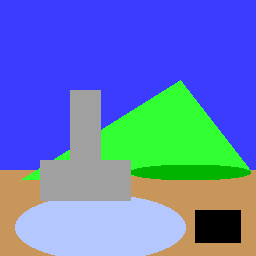

In [6]:
canvas = Image.new('RGB', (256, 256), label2colors[3])
draw = ImageDraw.ImageDraw(canvas)
# land
draw.rectangle((0,170,255,255), label2colors[95])
# mountain
draw.polygon([20,180, 180, 80, 250, 170], label2colors[17])
# tree
draw.ellipse((130, 165, 250, 180), label2colors[5])
# lake
draw.ellipse((15, 195, 185, 260), label2colors[129])
# skyscraper
draw.rectangle((70,90,100,160), label2colors[49])
draw.rectangle((40,160,130,200), label2colors[49])
# bus
draw.rectangle((195,210,240,242), label2colors[81])
canvas

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1347: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


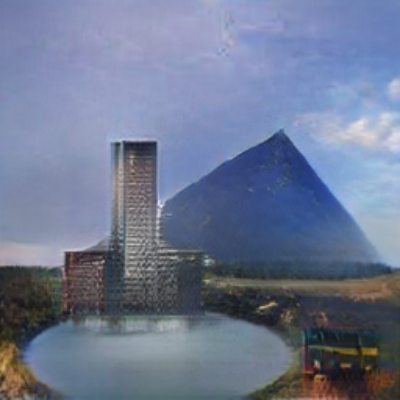

In [7]:
def fmap(x):
    return color2label[tuple(x)]
annotation = np.apply_along_axis(fmap, 2, canvas)[None, None, ...]
annotation = torch.tensor(np.float32(annotation)).cuda()
generated = model({'label': annotation, 'instance':null_instance, 'image':null_instance}, mode='inference')
img = generated.data.cpu().numpy()[0]
img = ((img+1.1)*130).clip(0, 255)
img = np.transpose(img, [1,2,0]).astype('uint8')
Image.fromarray(img).resize((400,400), Image.BILINEAR)